## Loading Library

In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [49]:
#1
data = pd.read_csv('https://raw.githubusercontent.com/VickySav/Datasets/refs/heads/main/bread%20basket.csv')
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [50]:
#2 info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
#3 check missing values
data.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a _________________________. (fill that blank on the section below)

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-52-338425d2388e>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date_time']).dt.date
<ipython-input-52-338425d2388e>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['hour'] = pd.to_datetime(data['date_time']).dt.hour


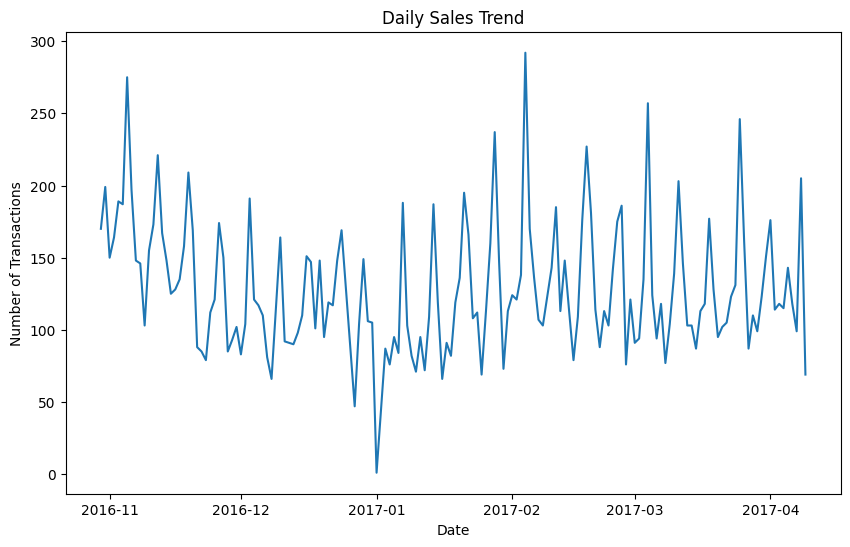

In [52]:
# 5
data['date'] = pd.to_datetime(data['date_time']).dt.date
data['hour'] = pd.to_datetime(data['date_time']).dt.hour

daily_sales = data.groupby('date').size()

plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Sales Trend')
plt.show()

data = data.drop(columns=['date'])
data = data.drop(columns=['hour'])


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [53]:
# 6
data['day'] = pd.to_datetime(data['date_time']).dt.day
data['month'] = pd.to_datetime(data['date_time']).dt.month
data['year'] = pd.to_datetime(data['date_time']).dt.year
data['time'] = pd.to_datetime(data['date_time']).dt.time
data['hour'] = pd.to_datetime(data['date_time']).dt.hour
data['day_name'] = pd.to_datetime(data['date_time']).dt.day_name()
data.sample(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-53-c8306bda373b>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['day'] = pd.to_datetime(data['date_time']).dt.day
<ipython-input-53-c8306bda373b>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['month'] = pd.to_datetime(data['date_time']).dt.month
<ipython-input-53-c8306bda373b>:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) wa

,Transaction,Item,date_time,period_day,weekday_weekend,day,month,year,time,hour,day_name
8021,4025,Coffee,30-12-2016 15:16,afternoon,weekday,30,12,2016,15:16:00,15,Friday
7322,3698,Coffee,23-12-2016 08:55,morning,weekday,23,12,2016,08:55:00,8,Friday
18558,8802,Extra Salami or Feta,25-03-2017 14:28,afternoon,weekend,25,3,2017,14:28:00,14,Saturday
2378,1157,Muffin,12-11-2016 13:12,afternoon,weekend,12,11,2016,13:12:00,13,Saturday
4607,2259,Cookies,28-11-2016 16:45,afternoon,weekday,28,11,2016,16:45:00,16,Monday
2455,1187,Brownie,12-11-2016 15:32,afternoon,weekend,12,11,2016,15:32:00,15,Saturday
333,157,Coffee,31-10-2016 14:05,afternoon,weekday,31,10,2016,14:05:00,14,Monday
12208,6039,Bread,05-02-2017 10:35,morning,weekend,5,2,2017,10:35:00,10,Sunday
17666,8395,Coffee,18-03-2017 15:41,afternoon,weekend,18,3,2017,15:41:00,15,Saturday
16720,7949,Hot chocolate,11-03-2017 11:53,morning,weekend,11,3,2017,11:53:00,11,Saturday



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-54-a02c0403f532>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date_time'])


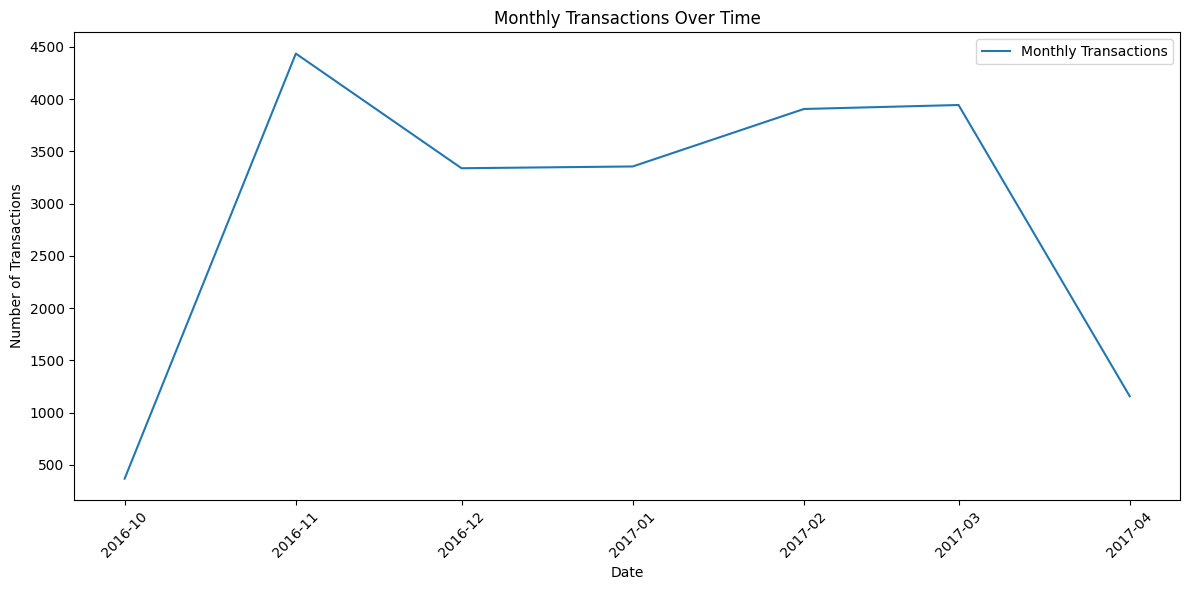

In [54]:
# 7
data['date'] = pd.to_datetime(data['date_time'])

monthly_transactions = data.groupby(['year', 'month']).size()

monthly_transactions = monthly_transactions.reset_index(name='Transaction Count')

monthly_transactions['date'] = pd.to_datetime(
    monthly_transactions[['year', 'month']].assign(Day=1)
)

plt.figure(figsize=(12, 6))
plt.plot(monthly_transactions['date'], monthly_transactions['Transaction Count'], label='Monthly Transactions')

plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Monthly Transactions Over Time')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

data = data.drop(columns=['date'])

8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

From October 2016 until November 2016 the transaction has reached the highest monthly transaction. Unfortunately on December 2016 until March 2017 the number of transaction is stagnant and on March 2017 to April 2017 the number of transaction decreasing.

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [55]:
#9
weekday_names = data.loc[data['weekday_weekend'] == 'weekday', 'day_name'].unique()

# Extract unique weekend names
weekend_names = data.loc[data['weekday_weekend'] == 'weekend', 'day_name'].unique()

print("Unique weekday names:", weekday_names)
print("Unique weekend names:", weekend_names)

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [56]:
#10
data['date_time'] = pd.to_datetime(data['date_time'])

data['month'] = data['date_time'].dt.month
data['day_name'] = data['date_time'].dt.day_name()

aggregation = data.pivot_table(
    index='month',
    columns='day_name',
    values='Transaction',
    aggfunc='count',
    fill_value=0
)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
aggregation = aggregation[day_order]

aggregation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-56-b9edb11d6c58>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date_time'] = pd.to_datetime(data['date_time'])


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is _____

First, there is a noticeable spike in transactions during weekends, particularly on Saturdays and Sundays, suggesting increased customer activity during these days. For instance, February and March show peak values of 879 and 883 transactions on Saturdays, respectively. Additionally, there is a clear seasonal variation, with higher transaction volumes in the early months, such as January, February, and March, compared to April, which exhibits a significant drop in activity. This pattern likely reflects seasonal demand or promotional periods.

Midweek activity appears steady, with Fridays consistently recording higher transactions than other weekdays, as seen in November, where Friday has 639 transactions compared to 469 on Monday. October shows an anomaly, with transactions recorded only on Monday (199) and Sunday (170), while the rest of the week shows no activity, which might indicate missing data or special events. Finally, December transactions peak on Fridays and Saturdays, aligning with holiday shopping trends and year-end sales.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


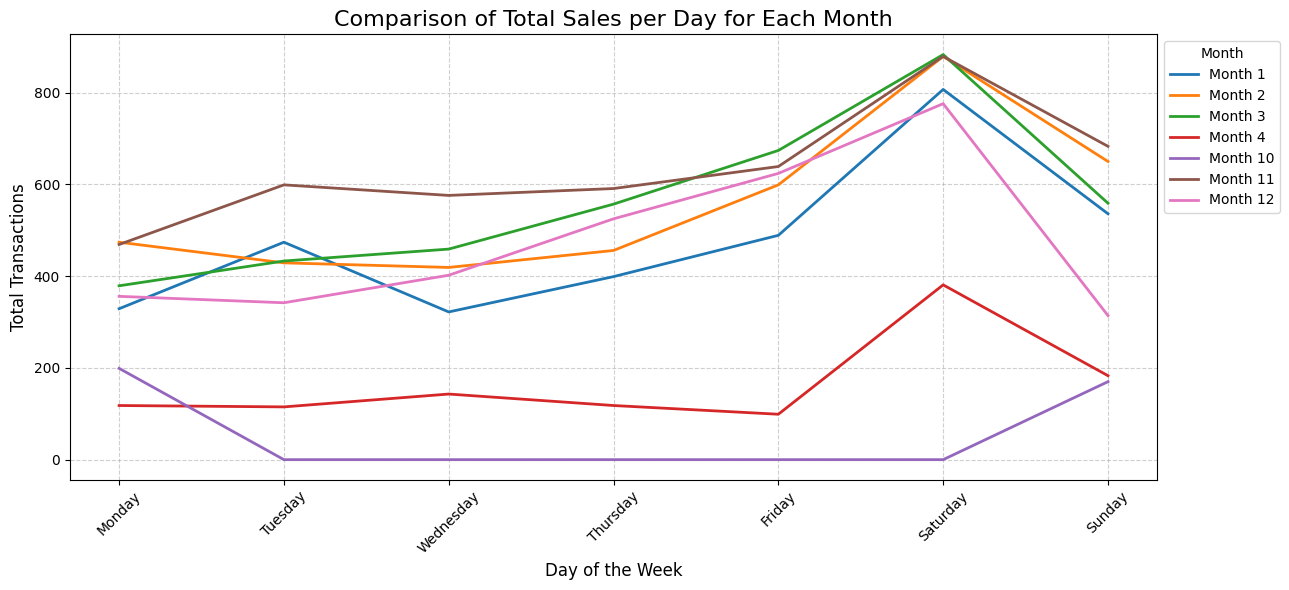

In [57]:
# 12

# Transpose the pivot table so that the days of the week are on the x-axis
pivot_table_t = aggregation.T

# Plot the line chart
plt.figure(figsize=(13, 6))

# Plot each month's data as a line, where the x-axis is the day of the week
for month in pivot_table_t.columns:
    plt.plot(pivot_table_t.index, pivot_table_t[month], label=f'Month {month}', linewidth=2, markersize=6)

# Add title and labels
plt.title('Comparison of Total Sales per Day for Each Month', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend to show which line corresponds to which month
plt.legend(title='Month', loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Adjust layout to fit everything
plt.tight_layout()

# Show the plot
plt.show()



13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

1. Weekend Peaks: Sales consistently peak on Saturdays across most months, indicating higher customer activity during weekends.
2. Friday Build-Up: There is a noticeable upward trend on Fridays leading into Saturdays, especially in months like February, March, and December, suggesting increased pre-weekend shopping behavior.
3. Weekday Stability: Sales on weekdays (Monday to Thursday) are relatively steady with minor variations, showing consistent customer engagement during these days.
4. Seasonal Differences: Certain months like April and October have significantly lower sales compared to others, indicating seasonality or possibly reduced business operations during these periods.
5. Holiday Season Effect: November and December show higher sales, particularly on weekends, likely due to holiday shopping and promotions.



Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [58]:
# 14
data['period_day'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [59]:
# 15
data.groupby('period_day')['hour'].unique()
print('Unique morning_hour:', data[data['period_day'] == 'morning']['hour'].unique())
print('Unique afternoon_hour:', data[data['period_day'] == 'afternoon']['hour'].unique())
print('Unique evening_hour:', data[data['period_day'] == 'evening']['hour'].unique())
print('Unique night_hour:', data[data['period_day'] == 'night']['hour'].unique())

Unique morning_hour: [ 9 10 11  8  7  1]
Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique night_hour: [21 23 22]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

The hour 1 is classified as part of the morning_hours, which seems unusual because typically, 1 AM is considered part of the night_hours, not morning.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


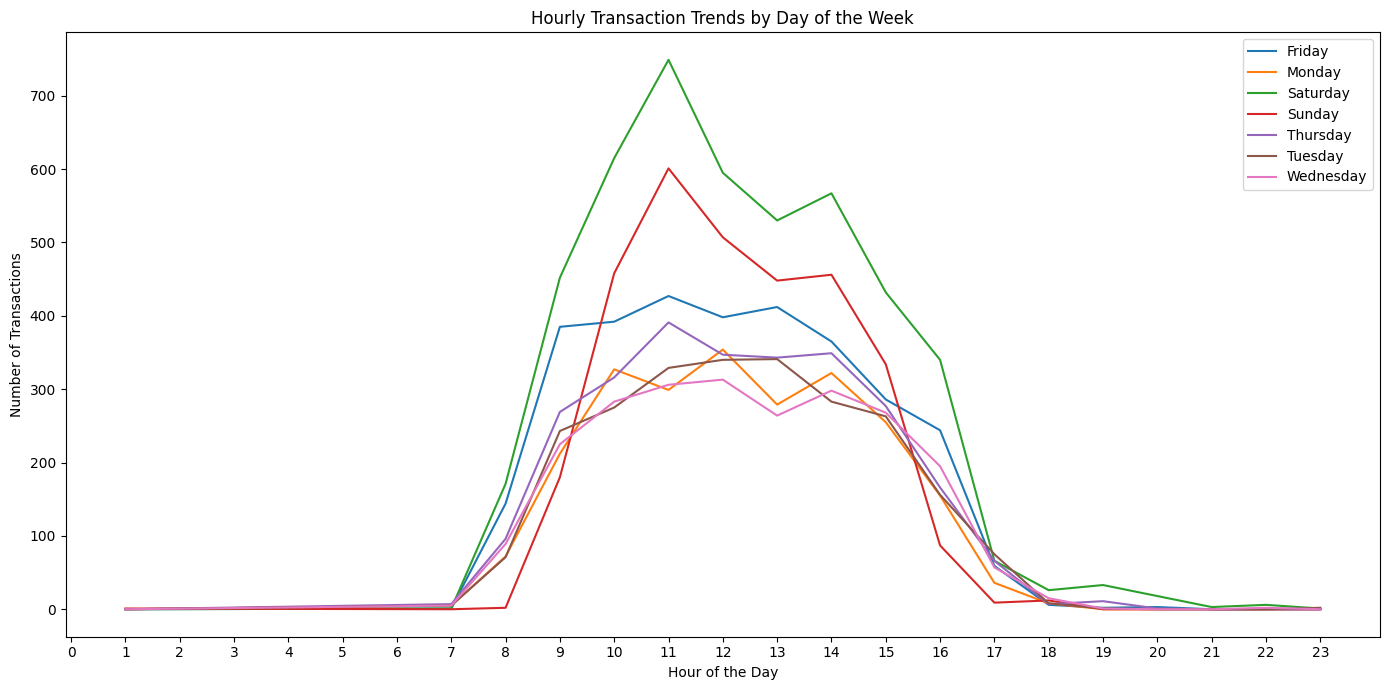

In [60]:
# 17
# Aggregate the data by hour and day_of_week
grouped = data.groupby(['hour', 'day_name'])['Transaction'].size().unstack(fill_value=0)

# Plot the hourly transaction trends for each day of the week
plt.figure(figsize=(14, 7))

for day in grouped.columns:
    plt.plot(grouped.index, grouped[day], label=day)

# Customize the plot
plt.title('Hourly Transaction Trends by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0,24))
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()



18. The daily sales trend plot reveals that _______


1. **Peak Sales Hours**: The busiest sales hours occur between 9 AM and 3 PM, with a distinct peak around lunchtime (11 AM to 1 PM) across most days of the week. This indicates a concentration of transactions during standard working hours.

2. **Weekend vs Weekday Patterns**: Saturdays and Sundays exhibit higher transaction volumes, particularly during peak hours, compared to weekdays. This aligns with the expectation that people have more time for shopping on weekends.

3. **Evening Decline**: There is a noticeable drop in sales after 5 PM across all days, with minimal activity during late evening and nighttime hours.

4. **Hourly Consistency Across Days**: While the general pattern is consistent, the magnitude of sales varies, with weekends showing significantly higher peaks compared to weekdays.

5. **Early Morning and Late Night Trends**: Sales are minimal during early morning hours (before 7 AM) and late night (after 9 PM), reflecting limited customer activity during these times.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


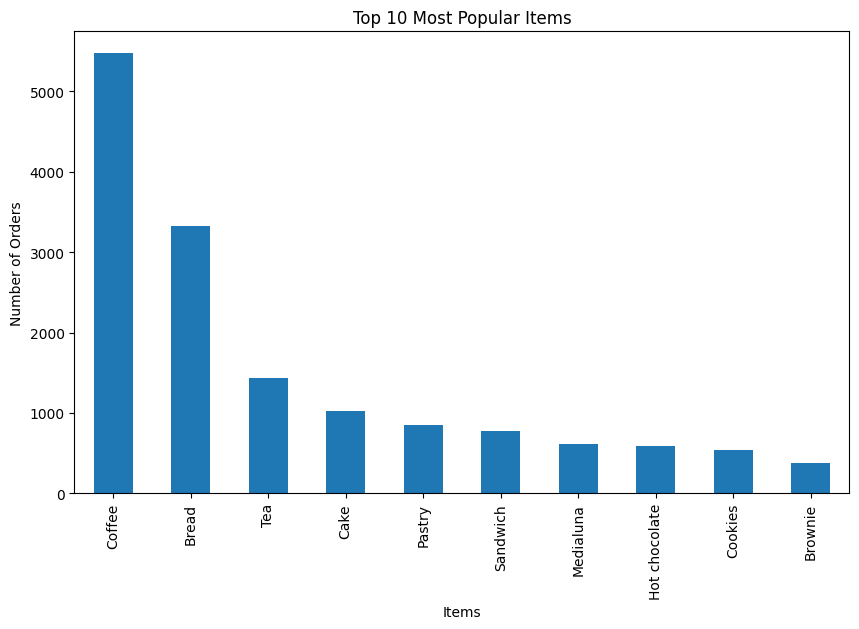

In [61]:
# 19
item_counts = data['Item'].value_counts().head(10)
plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Number of Orders')
plt.title('Top 10 Most Popular Items')
plt.xticks(rotation=90)
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


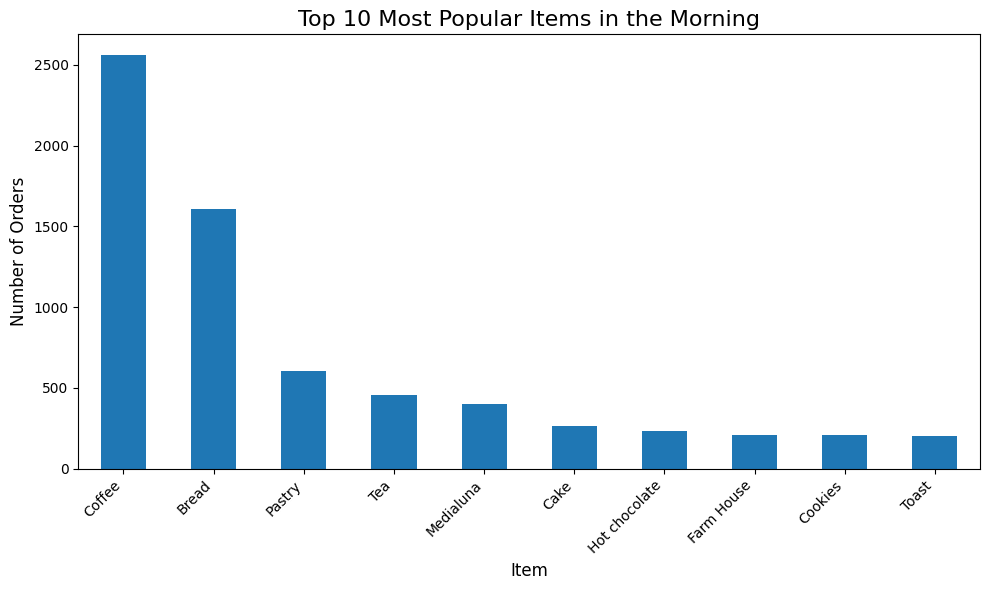

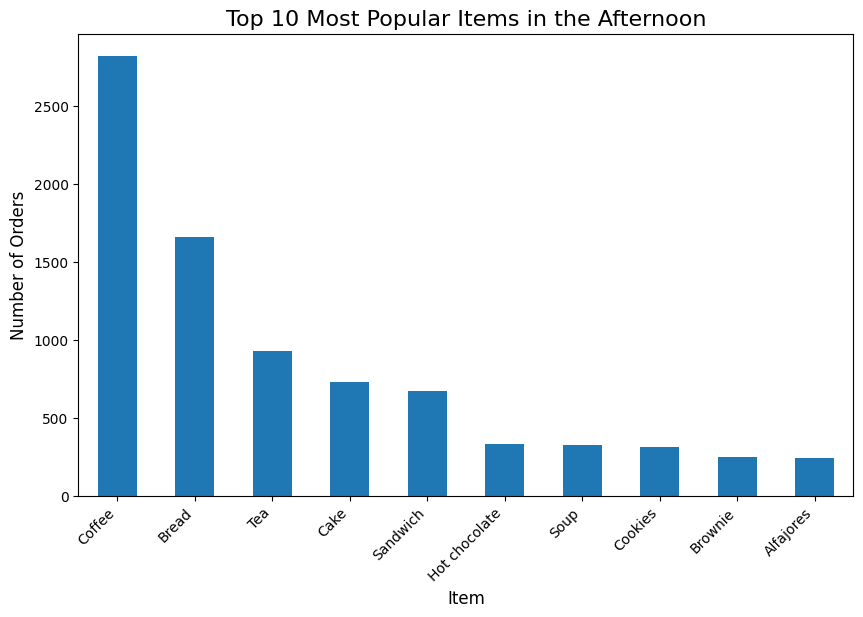

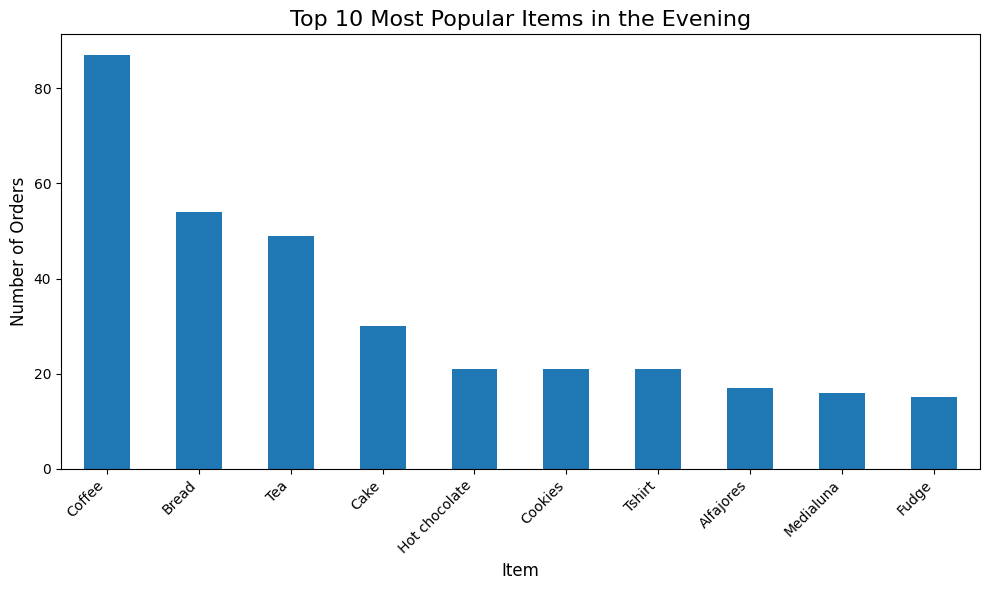

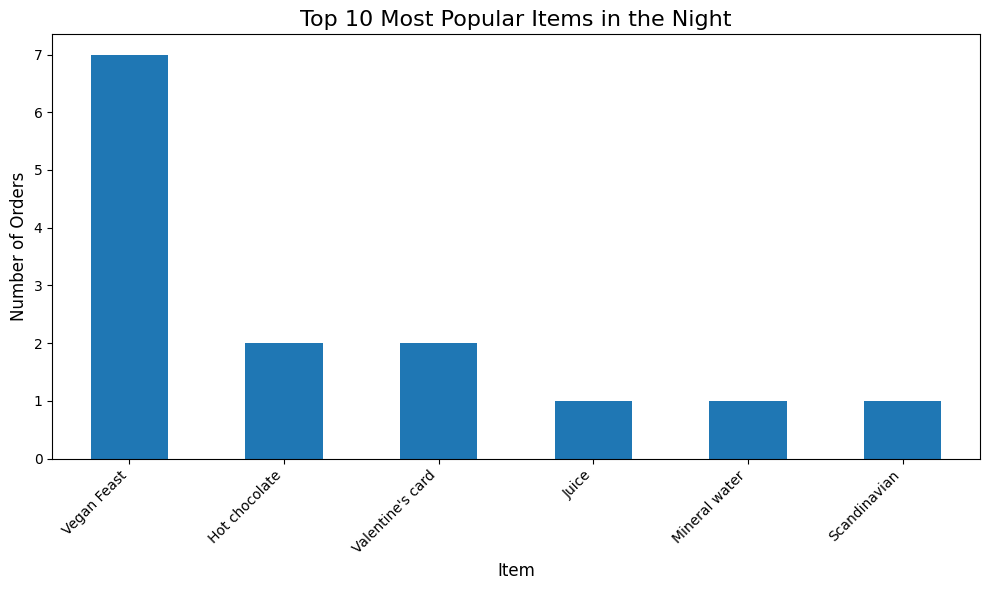

In [62]:
# 20
# Morning
morning_sales = data[data['period_day'] == 'morning']
morning_item_counts = morning_sales['Item'].value_counts()
top_10_morning_items = morning_item_counts.head(10)
plt.figure(figsize=(10, 6))
top_10_morning_items.plot(kind='bar')

plt.title('Top 10 Most Popular Items in the Morning', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Afternon
afternoon_sales = data[data['period_day'] == 'afternoon']
afternoon_item_counts = afternoon_sales['Item'].value_counts()
top_10_afternoon_items = afternoon_item_counts.head(10)
plt.figure(figsize=(10, 6))
top_10_afternoon_items.plot(kind='bar')

plt.title('Top 10 Most Popular Items in the Afternoon', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

plt.xticks(rotation=45, ha='right')

# Evening
evening_sales = data[data['period_day'] == 'evening']
evening_item_counts = evening_sales['Item'].value_counts()
top_10_evening_items = evening_item_counts.head(10)
plt.figure(figsize=(10, 6))
top_10_evening_items.plot(kind='bar')

plt.title('Top 10 Most Popular Items in the Evening', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Night
night_sales = data[data['period_day'] == 'night']
night_item_counts = night_sales['Item'].value_counts()
top_10_night_items = night_item_counts.head(10)
plt.figure(figsize=(10, 6))
top_10_night_items.plot(kind='bar')

plt.title('Top 10 Most Popular Items in the Night', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

21. It turns out that there is something different in the plot above, the insight is ____


In the night people often bought vegan feast, hot chocolate. While in the afternoon, morning, and evening people bought coffee, bread, and tea.


I found a valentine card, I was curious about when people bought it so I made a visualization of it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-63-91ee877abeb2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valentine_sales['date'] = pd.to_datetime(valentine_sales['date_time']).dt.date


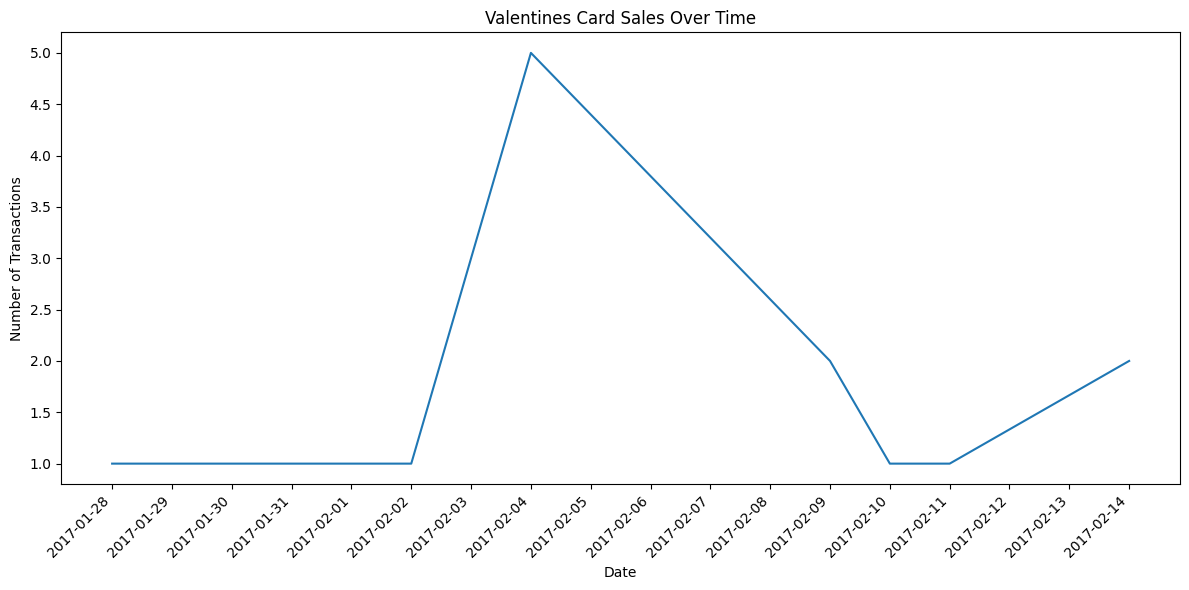

<Figure size 640x480 with 0 Axes>

In [63]:
#22
valentine_sales = data[data['Item'].str.contains('Valentine', case=False, na=False)]

valentine_sales['date'] = pd.to_datetime(valentine_sales['date_time']).dt.date
sales_by_date = valentine_sales.groupby('date').size()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, linestyle='-', label='Valentine Card Sales')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Adjust interval as needed
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Valentines Card Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Show the plot
plt.tight_layout()
plt.show()

23. I found the insight from the sale of the Valentine's cards above is ____


The insight from the sale of the Valentine's cards above is that there is a peak in transactions around February 4th, followed by a gradual decline leading up to Valentine's Day. However, there is a small increase in sales just before February 14th, indicating last-minute purchases. This suggests that most people plan ahead, but some buyers make decisions closer to the date.

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [64]:
# 24
apriori_data = pd.crosstab(data['Transaction'], data['Item'])
apriori_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
#25

# Convert quantities to 1 and 0
basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-65-024034fe465c>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [77]:
# 26
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

output = frequent_itemsets[['support', 'itemsets']]

output['itemsets'] = output['itemsets'].apply(lambda x: ', '.join(x))

output = output.sort_values(by='itemsets', ascending=True).reset_index(drop=True)

output

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,Alfajores
1,0.327205,Bread
2,0.023349,"Bread, Cake"
3,0.090016,"Bread, Coffee"
4,0.040042,Brownie
5,0.103856,Cake
6,0.054728,"Cake, Coffee"
7,0.478394,Coffee
8,0.028209,"Coffee, Cookies"
9,0.029583,"Coffee, Hot chocolate"


In [78]:
# 27
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules = rules[['antecedents', 'consequents', 'antecedent support', 'consequent support', 'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']]
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
1,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
2,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
3,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
4,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
5,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
6,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
7,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
8,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048
9,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



1. Identifying Popular Products: By examining item frequency, we discovered the most popular products, such as Bread, Coffee, and Pastry, which represent the backbone of sales. This insight allows the bakery to focus on these key items and ensure they are always well-stocked.
2. Understanding Transaction Patterns: The analysis of transaction times reveals peak hours of sales, primarily during late mornings and afternoons. This helps in making staffing and stocking decisions to meet customer demand at optimal times.
3. Leveraging Product Associations: The application of the Apriori algorithm highlighted valuable product associations, like Cake and Coffee. Such insights can guide cross-selling strategies, enabling the bakery to suggest complementary items to customers, thereby increasing sales.
4. Actionable Recommendations: The findings provide concrete recommendations for inventory management, promotional strategies, and customer engagement, enhancing both operational efficiency and customer experience.